### About this datset
This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort 

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [173]:

# Save the data to a variable named df_csv
df_csv = pd.read_csv("hotel_bookings.csv")
df_csv.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Line Chart
### - Using Seaborn: 

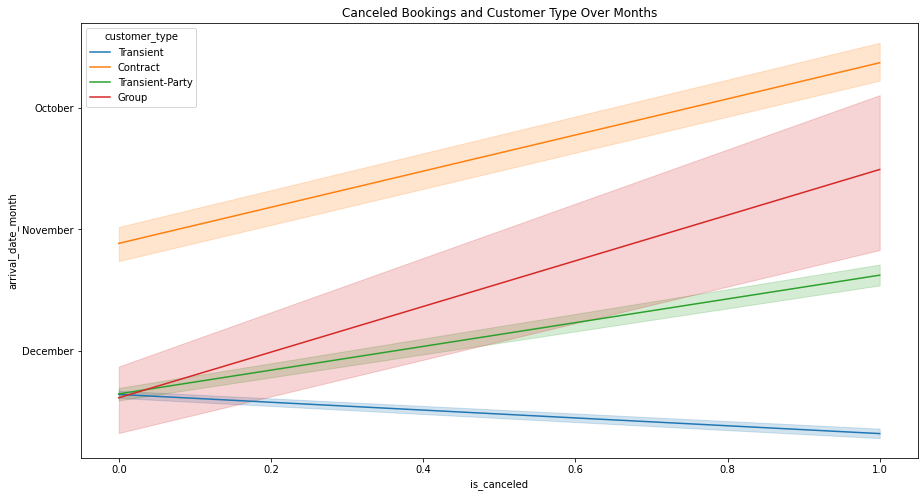

In [119]:
p=sns.lineplot(data=df_csv, x="is_canceled", y="arrival_date_month", hue="customer_type")
plt.title("Canceled Bookings and Customer Type Over Months")
plt.gcf().set_size_inches(15, 8)
plt.show()
#We can see that October, November, December has highest cancelation movements.
#Contract customer's type has highest cancelation movments, 
#so we can conclued that most cancelation movements are happening in the holidays seasons.

# Barchart
In this analyzing, I wanted to check if there is any difference between the preference days to book a hotels over months.

Text(0.5, 1.0, 'Number of Stays in Week Days Over Months ')

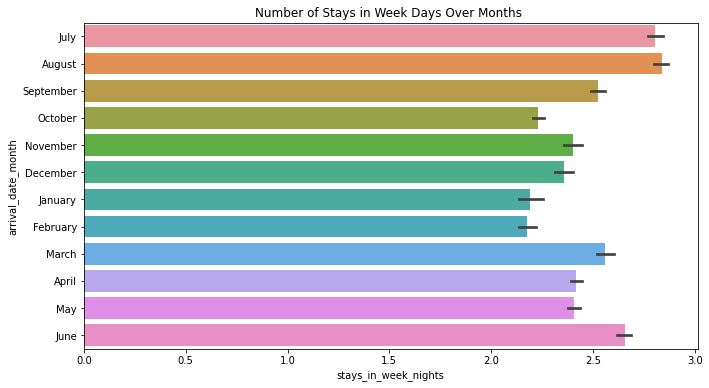

In [108]:
sns.barplot( x="stays_in_week_nights", y="arrival_date_month",data=df_csv, order=None, hue_order="is_canceled",
                ci=95, n_boot=1000,  palette=None,
                saturation=0.75, errcolor='.26', dodge=True)
sns.color_palette("mako", as_cmap=True)
plt.gcf().set_size_inches(11, 6)
plt.title("Number of Stays in Week Days Over Months ")
#First observation shows that the period between Februry and October has lowest booking in week days.
#Let's check weekedns in next chart.

Text(0.5, 1.0, 'Number of Stays in Weekends Over Months ')

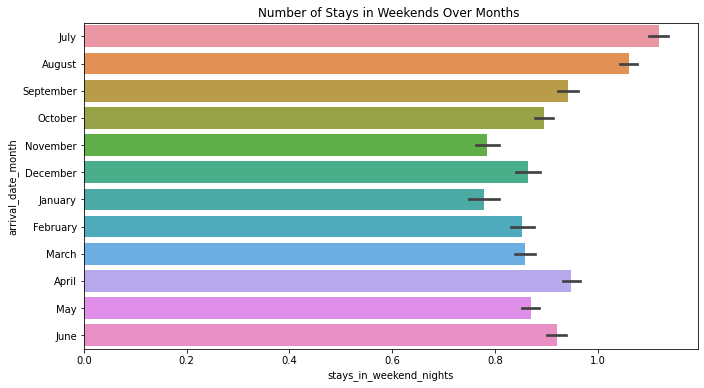

In [109]:
sns.barplot( x="stays_in_weekend_nights", y="arrival_date_month", hue=None, data=df_csv, order=None, hue_order="is_canceled",
                ci=95, n_boot=1000,  palette=None,
                saturation=0.75, errcolor='.26', dodge=True)
sns.color_palette("mako", as_cmap=True)
plt.gcf().set_size_inches(11, 6)
plt.title("Number of Stays in Weekends Over Months ")
#This observation is quite simillar to the previous one.
#We can conclude that holidies and work days has no big effect on choosing the booking day.

# Scaterplot

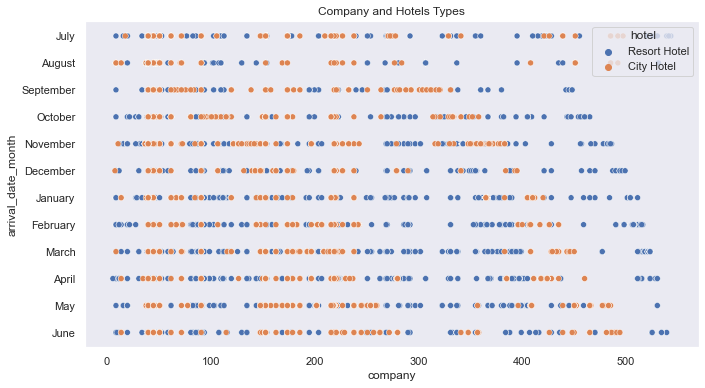

In [190]:
sns.scatterplot( x="company" ,hue="hotel" ,y="arrival_date_month" ,
                   data=df_csv)
plt.gcf().set_size_inches(11, 6)
plt.title("Company and Hotels Types")
sns.set(style='dark')
plt.show()
#We can see that highes reservations are in resorts as shows from blue that exceed over 500 companies' reservations.
#July and June despite that it is the time for summer vecation, companies tend to reserve hotels in this period of time.
#We can see that July and June have highest reservations for companies.

# Pie Chart

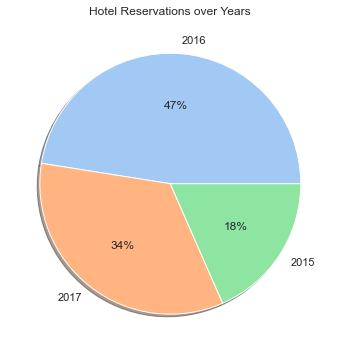

In [204]:
series= df_csv["arrival_date_year"].value_counts()
labels = series.index
values = series.values
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%',shadow=True)
plt.title("Hotel Reservations over Years")
plt.gcf().set_size_inches(11, 6)
plt.show()
#We can see that year 2016 has highest reservations.
#Then 2017 

# Histogram 

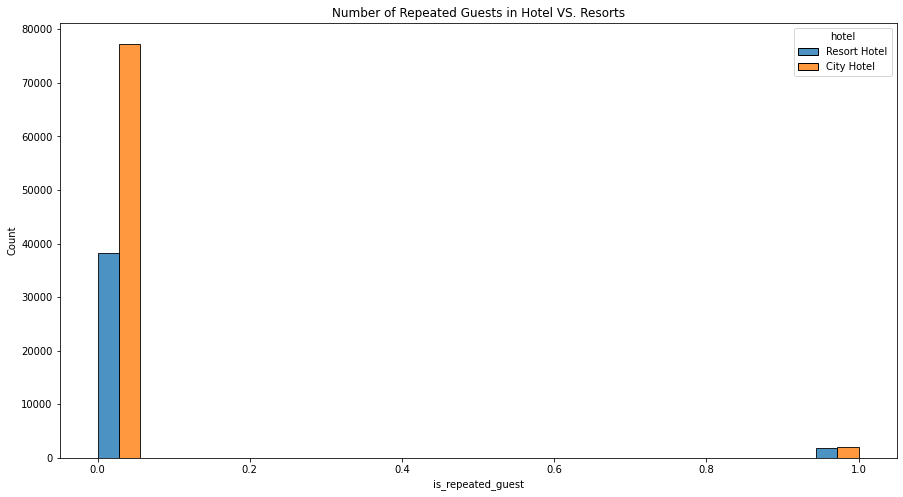

In [79]:
sns.histplot(
    df_csv,
    x="is_repeated_guest",
    hue="hotel", # this feature has to be categorical
    multiple="dodge",
    alpha=0.8)
plt.title("Number of Repeated Guests in Hotel VS. Resorts")
plt.gcf().set_size_inches(15, 8)
#I have expect that resorts will have more reapeted guests because they usually provide better services comparing with hotels
#After analyzing the data,it has been proved that resorts have more repeated customers 

 # Boxplot

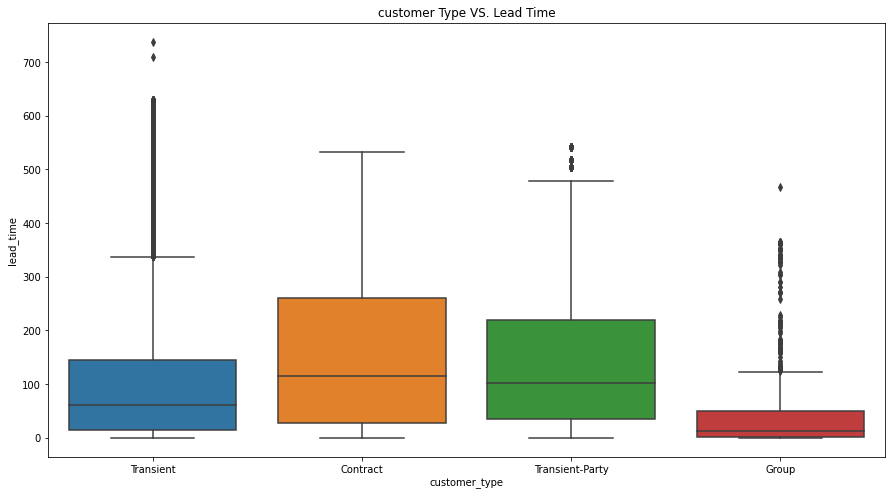

In [113]:
plt.figure(figsize=(10,8))

sns.boxplot(
    x="customer_type",
    y="lead_time",
    data=df_csv
)

plt.title("customer Type VS. Lead Time")
plt.gcf().set_size_inches(15, 8)
#Lead time is the period between reservation date and arrival date.
#I wanted to know if there is any difference between lead time of different type of customers.
#We can see that maximum leas time is for contract and transient party customers. 
#Lowest is for the group customers.

# Subplots

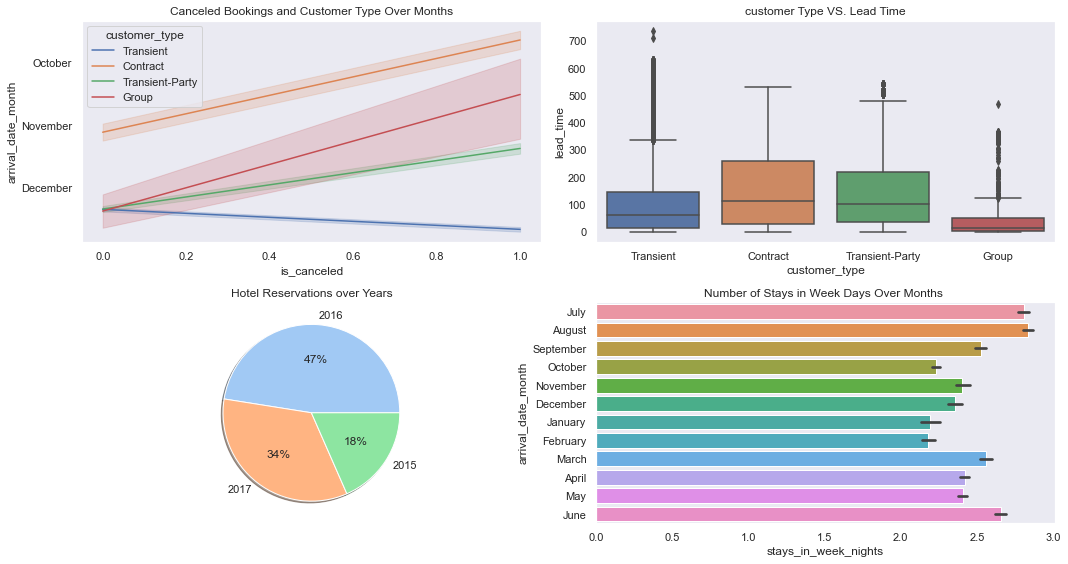

In [210]:
plt.figure(figsize=(10,8))
#plot 1:
plt.subplot(2, 2, 1) # 2x2 plot with plot position 1 (upper left)
p=sns.lineplot(data=df_csv, x="is_canceled", y="arrival_date_month", hue="customer_type")
plt.title("Canceled Bookings and Customer Type Over Months")

#plot 2:
plt.subplot(2, 2, 2) # 2x2 plot with plot position 2 (upper right)
sns.boxplot(
    x="customer_type",
    y="lead_time",
    data=df_csv)
plt.title("customer Type VS. Lead Time")
plt.gcf().set_size_inches(15, 8)

# plot 3:
# Create some fake data
plt.subplot(2,2,3) # 2x2 plot with plot position 2 (lower left)
series= df_csv["arrival_date_year"].value_counts()
labels = series.index
values = series.values
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%',shadow=True)
plt.title("Hotel Reservations over Years")


# plot 4:
# Create some fake data
plt.subplot(2,2,4) # 2x2 plot with plot position 2 (lower right)
sns.barplot( x="stays_in_week_nights", y="arrival_date_month",data=df_csv, order=None, hue_order="is_canceled",
                ci=95, n_boot=1000,  palette=None,
                saturation=0.75, errcolor='.26', dodge=True)
sns.color_palette("mako", as_cmap=True)
plt.title("Number of Stays in Week Days Over Months ")

plt.tight_layout() 

plt.show()